Reinforcement Learning
------------------------

**Chapman Siu**

The example in this notebook is based on blog post and code provided here: 
*  https://gist.github.com/EderSantana/c7222daa328f0e885093  
*  https://edersantana.github.io/articles/keras_rl/  


In [1]:
%matplotlib inline
from IPython.display import HTML
from Catch import Catch, animate

In [2]:
grid_size = 10
catch = Catch(grid_size)

In [3]:
catch._draw_state()

array([[ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.]])

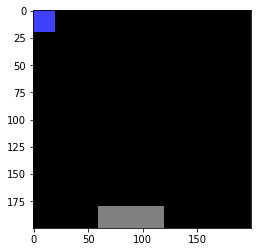

In [4]:
catch.show_game()

In [5]:
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)
catch._update_state(1)

In [6]:
animate(catch.replay_states)

In [7]:
from IPython.display import HTML
import random
HTML("<img src='output_animated.gif?{}'>".format(round(random.random()*100)))

In [8]:
# we win!
"""
How to best teach a machine to learn how to play this game??
"""

'\nHow to best teach a machine to learn how to play this game??\n'

In [9]:
from DeepQNetwork import DeepQN

Using TensorFlow backend.


In [10]:
qdnlearner = DeepQN(num_states=(10, 10, ),
    num_actions = 3, 
    rar = 0.98, 
    radr = 0.9999, 
    memory = 500,
    verbose=False) #initialize the learner

In [11]:
max_iter = 2000
save_iter = [0, 500, 1000, 1500, 1999]
replay_iter = {}

for iteration in range(0, max_iter):
    catch.reset()
    game_over = False
    
    state = catch.observe()
    action = qdnlearner.querysetstate(state)       
    
    while not game_over:        
        # move paddle
        state, r, game_over = catch.act(action)
        action = qdnlearner.query(state, r)
        
    if iteration in save_iter:
        replay_iter[iteration] = catch.replay_states.copy()
    if iteration % 100 == 0:
        print(iteration)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [12]:
iter_id = 0
animate(replay_iter[iter_id], animation='output_catch{}.gif'.format(iter_id))
HTML("<img src='output_catch{}.gif?{}'>".format(iter_id, round(random.random()*100)))

In [13]:
iter_id = 500
animate(replay_iter[iter_id], animation='output_catch{}.gif'.format(iter_id))
HTML("<img src='output_catch{}.gif?{}'>".format(iter_id, round(random.random()*100)))

In [14]:
iter_id = 1000
animate(replay_iter[iter_id], animation='output_catch{}.gif'.format(iter_id))
HTML("<img src='output_catch{}.gif?{}'>".format(iter_id, round(random.random()*100)))

In [15]:
iter_id = 1500
animate(replay_iter[iter_id], animation='output_catch{}.gif'.format(iter_id))
HTML("<img src='output_catch{}.gif?{}'>".format(iter_id, round(random.random()*100)))

In [16]:
iter_id = 1999
animate(replay_iter[iter_id], animation='output_catch{}.gif'.format(iter_id))
HTML("<img src='output_catch{}.gif?{}'>".format(iter_id, round(random.random()*100)))

In [23]:
### now no more training, just play the game...
catch.reset()
game_over = False

state = catch.observe()
action = qdnlearner.querysetstate(state)       

while not game_over:        
    # move paddle
    state, r, game_over = catch.act(action)
    action = qdnlearner.querysetstate(state)

animate(catch.replay_states, animation='output_catch_play.gif')
HTML("<img src='output_catch_play.gif?{}'>".format(round(random.random()*100)))